# Simulated Data: Extremely Noisy 4-D STEM Strain Mapping Using Cycle Consistent Spatial Transforming Autoencoders 


## Package Installation

Make sure to install auto4dstem from source:

```bash
pip install auto4dstem
```

## Package Loading

In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch
import pickle
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from cmcrameri import cm
from auto4dstem.nn.Train_Function import Train
from auto4dstem.masks.masks import Mask
from auto4dstem.viz.viz import set_format_Auto4D, visualize_simulate_result, visual_performance_plot,normalized_strain_matrices
from m3util.util.IO import download_files_from_txt

## Device Setting

In [ ]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using GPU")
else:
    device = torch.device('cpu')
    print("Using CPU")

Using GPU


## Visualization Format 

Set the format for standard plotting throughout the notebook

In [3]:
set_format = set_format_Auto4D()
pylab.rcParams.update(set_format)

In [4]:
# warnings.filterwarnings('ignore') 

## Download Data and Pre-Trained Models

In [19]:
folder_name = './data'
file_download =  "./Simulated_4dstem/Extremely_Noisy_4DSTEM_Strain_Mapping_Using_CC_ST_AE_Simulated/simulated_label_weights_affine_para.txt"

In [ ]:
# check where are you from the root path
download_files_from_txt(file_download,folder_name)

  1%|▏         | 1/72 [00:03<04:31,  3.82s/it]

Downloaded: 40percent_noisy_simulated_4dstem_pretrained_weights.pkl


  3%|▎         | 2/72 [00:08<04:59,  4.28s/it]

Downloaded: 45percent_noisy_simulated_4dstem_pretrained_weights.pkl


  4%|▍         | 3/72 [00:09<03:10,  2.75s/it]

Downloaded: 60Percent_pretrained_rotation.npy


  6%|▌         | 4/72 [00:10<02:21,  2.08s/it]

Downloaded: analysis_bg50per_1e5counts__strain.h5


  7%|▋         | 5/72 [00:14<02:58,  2.66s/it]

Downloaded: 25percent_noisy_simulated_4dstem_pretrained_weights.pkl


  8%|▊         | 6/72 [00:15<02:16,  2.07s/it]

Downloaded: 20Percent_pretrained_rotation.npy


 10%|▉         | 7/72 [00:15<01:48,  1.67s/it]

Downloaded: Label_shear_xy.npy


 11%|█         | 8/72 [00:16<01:30,  1.41s/it]

Downloaded: Label_strain_yy.npy


 12%|█▎        | 9/72 [00:17<01:20,  1.28s/it]

Downloaded: 25Percent_pretrained_rotation.npy


 14%|█▍        | 10/72 [00:21<02:04,  2.00s/it]

Downloaded: 10percent_noisy_simulated_4dstem_pretrained_weights.pkl


 15%|█▌        | 11/72 [00:24<02:24,  2.37s/it]

Downloaded: 30percent_noisy_simulated_4dstem_pretrained_weights.pkl


 17%|█▋        | 12/72 [00:25<02:01,  2.02s/it]

Downloaded: analysis_bg40per_1e5counts__strain.h5


 18%|█▊        | 13/72 [00:29<02:33,  2.59s/it]

Downloaded: 05percent_noisy_simulated_4dstem_pretrained_weights.pkl


 19%|█▉        | 14/72 [00:33<02:52,  2.97s/it]

Downloaded: 70percent_noisy_simulated_4dstem_pretrained_weights.pkl


 21%|██        | 15/72 [00:34<02:17,  2.41s/it]

Downloaded: analysis_bg45per_1e5counts__strain.h5


 22%|██▏       | 16/72 [00:38<02:44,  2.94s/it]

Downloaded: 00percent_noisy_simulated_4dstem_pretrained_weights.pkl


 24%|██▎       | 17/72 [00:43<03:02,  3.33s/it]

Downloaded: 60percent_noisy_simulated_4dstem_pretrained_weights.pkl


 25%|██▌       | 18/72 [00:46<03:05,  3.43s/it]

Downloaded: 35percent_noisy_simulated_4dstem_pretrained_weights.pkl


 26%|██▋       | 19/72 [00:47<02:22,  2.69s/it]

Downloaded: 00Percent_pretrained_rotation.npy


 28%|██▊       | 20/72 [00:49<02:01,  2.34s/it]

Downloaded: analysis_bg20per_1e5counts__strain.h5


 29%|██▉       | 21/72 [00:53<02:23,  2.81s/it]

Downloaded: 20percent_noisy_simulated_4dstem_pretrained_weights.pkl


 31%|███       | 22/72 [00:57<02:45,  3.31s/it]

Downloaded: 50percent_noisy_simulated_4dstem_pretrained_weights.pkl


 32%|███▏      | 23/72 [00:58<02:09,  2.65s/it]

Downloaded: analysis_bg60per_1e5counts__strain.h5


 33%|███▎      | 24/72 [00:59<01:44,  2.18s/it]

Downloaded: analysis_bg70per_1e5counts__strain.h5


 35%|███▍      | 25/72 [01:00<01:23,  1.78s/it]

Downloaded: 70Percent_pretrained_rotation.npy


 36%|███▌      | 26/72 [01:01<01:10,  1.53s/it]

Downloaded: 45Percent_pretrained_rotation.npy


 38%|███▊      | 27/72 [01:02<01:02,  1.40s/it]

Downloaded: analysis_bg05per_1e5counts__strain.h5


 39%|███▉      | 28/72 [01:03<00:57,  1.32s/it]

Downloaded: analysis_bg15per_1e5counts__strain.h5


 40%|████      | 29/72 [01:04<00:51,  1.19s/it]

Downloaded: 15Percent_pretrained_rotation.npy


 42%|████▏     | 30/72 [01:05<00:48,  1.15s/it]

Downloaded: analysis_bg00per_1e5counts__strain.h5


 43%|████▎     | 31/72 [01:06<00:45,  1.12s/it]

Downloaded: analysis_bg30per_1e5counts__strain.h5


 44%|████▍     | 32/72 [01:07<00:44,  1.12s/it]

Downloaded: analysis_bg25per_1e5counts__strain.h5


 46%|████▌     | 33/72 [01:08<00:40,  1.03s/it]

Downloaded: Label_rotation.npy


 47%|████▋     | 34/72 [01:13<01:24,  2.21s/it]

Downloaded: 15percent_noisy_simulated_4dstem_pretrained_weights.pkl


 49%|████▊     | 35/72 [01:14<01:07,  1.83s/it]

Downloaded: 10Percent_pretrained_rotation.npy


 50%|█████     | 36/72 [01:15<00:56,  1.56s/it]

Downloaded: 40Percent_pretrained_rotation.npy


 51%|█████▏    | 37/72 [01:16<00:48,  1.37s/it]

Downloaded: 30Percent_pretrained_rotation.npy


 53%|█████▎    | 38/72 [01:17<00:42,  1.25s/it]

Downloaded: 05Percent_pretrained_rotation.npy


 54%|█████▍    | 39/72 [01:18<00:37,  1.15s/it]

Downloaded: 35Percent_pretrained_rotation.npy


 56%|█████▌    | 40/72 [01:19<00:36,  1.15s/it]

Downloaded: analysis_bg10per_1e5counts__strain.h5


 57%|█████▋    | 41/72 [01:20<00:33,  1.09s/it]

Downloaded: 50Percent_pretrained_rotation.npy


 58%|█████▊    | 42/72 [01:21<00:33,  1.12s/it]

Downloaded: analysis_bg35per_1e5counts__strain.h5


 60%|█████▉    | 43/72 [01:22<00:29,  1.03s/it]

Downloaded: Label_strain_xx.npy


 61%|██████    | 44/72 [01:23<00:28,  1.03s/it]

Downloaded: 45Per_2_train_process_scale_shear.npy


 62%|██████▎   | 45/72 [01:24<00:27,  1.03s/it]

Downloaded: 60Per_2_train_process_scale_shear.npy


 64%|██████▍   | 46/72 [01:25<00:27,  1.05s/it]

Downloaded: 30Per_2_train_process_scale_shear.npy


 65%|██████▌   | 47/72 [01:26<00:24,  1.02it/s]

Downloaded: 40Per_2_train_process_rotation.npy


 67%|██████▋   | 48/72 [01:32<00:56,  2.37s/it]

Downloaded: 10Per_2_train_process_scale_shear.npy


 68%|██████▊   | 49/72 [01:33<00:44,  1.95s/it]

Downloaded: 20Per_2_train_process_scale_shear.npy


 69%|██████▉   | 50/72 [01:33<00:35,  1.62s/it]

Downloaded: 30Per_2_train_process_rotation.npy


 71%|███████   | 51/72 [01:34<00:30,  1.45s/it]

Downloaded: 05Per_2_train_process_scale_shear.npy


 72%|███████▏  | 52/72 [01:35<00:25,  1.26s/it]

Downloaded: 05Per_2_train_process_rotation.npy


 74%|███████▎  | 53/72 [01:36<00:21,  1.15s/it]

Downloaded: 25Per_2_train_process_rotation.npy


 75%|███████▌  | 54/72 [01:37<00:19,  1.08s/it]

Downloaded: 45Per_2_train_process_rotation.npy


 76%|███████▋  | 55/72 [01:38<00:17,  1.05s/it]

Downloaded: 35Per_2_train_process_scale_shear.npy


 78%|███████▊  | 56/72 [01:39<00:16,  1.06s/it]

Downloaded: 50Per_2_train_process_scale_shear.npy


 79%|███████▉  | 57/72 [01:40<00:17,  1.15s/it]

Downloaded: 70Per_2_train_process_scale_shear.npy


 81%|████████  | 58/72 [01:41<00:14,  1.06s/it]

Downloaded: 00Per_2_train_process_rotation.npy


 82%|████████▏ | 59/72 [01:42<00:13,  1.00s/it]

Downloaded: 10Per_2_train_process_rotation.npy


 83%|████████▎ | 60/72 [01:43<00:12,  1.06s/it]

Downloaded: 00Per_2_train_process_scale_shear.npy


 85%|████████▍ | 61/72 [01:44<00:11,  1.01s/it]

Downloaded: 20Per_2_train_process_rotation.npy


 86%|████████▌ | 62/72 [01:45<00:09,  1.01it/s]

Downloaded: 15Per_2_train_process_rotation.npy


 88%|████████▊ | 63/72 [01:46<00:08,  1.04it/s]

Downloaded: 35Per_2_train_process_rotation.npy


 89%|████████▉ | 64/72 [01:47<00:08,  1.01s/it]

Downloaded: 15Per_2_train_process_scale_shear.npy


 90%|█████████ | 65/72 [01:48<00:07,  1.00s/it]

Downloaded: 25Per_2_train_process_scale_shear.npy


 92%|█████████▏| 66/72 [01:49<00:05,  1.02it/s]

Downloaded: 40Per_2_train_process_scale_shear.npy


 93%|█████████▎| 67/72 [01:50<00:04,  1.04it/s]

Downloaded: 50Per_2_train_process_rotation.npy


 94%|█████████▍| 68/72 [01:51<00:03,  1.08it/s]

Downloaded: 60Per_2_train_process_rotation.npy


 96%|█████████▌| 69/72 [01:52<00:03,  1.01s/it]

Downloaded: 70Per_2_train_process_rotation.npy


 97%|█████████▋| 70/72 [01:53<00:01,  1.06it/s]

Downloaded: simulated_4dstem_grain_index.npy


 99%|█████████▊| 71/72 [01:53<00:00,  1.27it/s]

Downloaded: MAE_list_simulated_4dstem.pickle


## Mask Construction



### Build Mask

We build a ring mask with inner radius 50 and outer radius 85, to only calculate the loss in the region of interest where there are diffraction spots. This avoids the central region where there is no diffraction spot - and limited information regarding the strain. 

In [6]:
# set mask class
set_mask = Mask()

# generate mask 
mask_tensor, mask_list = set_mask.mask_ring(radius_1=50, radius_2 = 85)

## Benchmark Simulated 4DSTEM Dataset

### Set Parameters

Sets the initial Background level (BKG level), Load Data and Pre-Trained Weights

In [7]:
bkg_intensity = 0
bkg_str = format(int(bkg_intensity*100),'02d')
data_path = os.path.abspath(f'{folder_name}/polycrystal_output4D.mat')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

## Initialize Training Class

This initializes the training class with the given parameters, and loads the data. 

In [8]:
tc = Train(data_path,
                device = device, 
                transpose = (1,0,3,2),
                background_weight=bkg_intensity,
                learned_rotation=rotation_path,
                adjust_learned_rotation = 0,
                num_base=1,
                up_size=800,
                scale_limit=0.05,
                shear_limit=0.1,
                rotation_limit=0.1,
                trans_limit = 0.15,
                adj_mask_para=0,
                fixed_mask = mask_list,
                check_mask = None,
                interpolate = True,
                revise_affine = False,
                folder_path = folder_name
                )

/home/jca92/Auto4DSTEM/content/data/polycrystal_output4D.mat
add image-rotation pair to whole dataset


100%|██████████| 65536/65536 [00:00<00:00, 457565.51it/s]


#### Random Diffraction Image

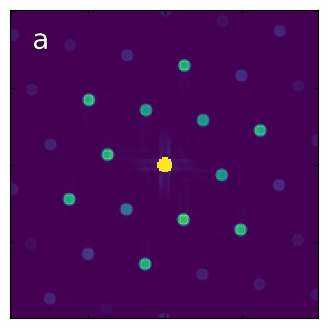

In [9]:
tc.crop_one_image(clim=[0,4e-5])

**Figure 1: Random diffraction image from 4D-STEM**

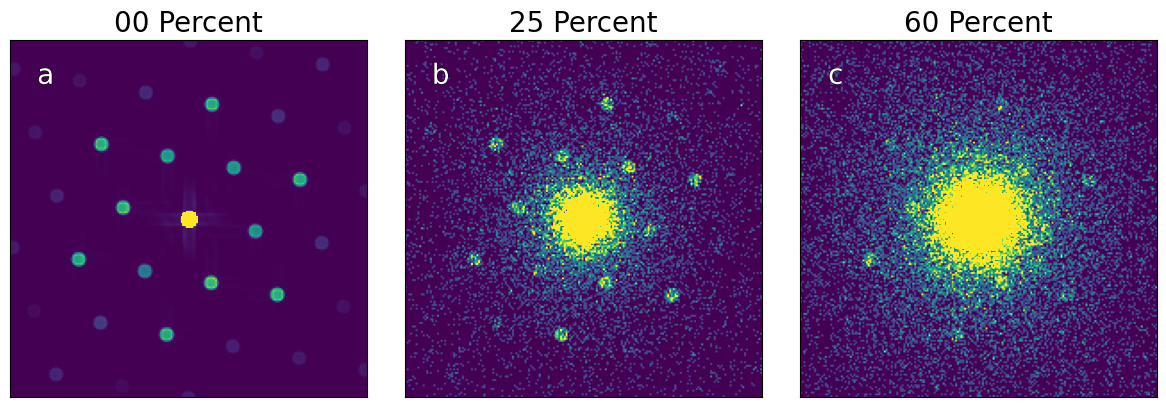

In [12]:
tc.visual_noise(noise_level = [0,0.25,0.6],file_name='simulated',add_label = True,save_format = 'png')

**Figure 2: Diffract image with various Poisson Ditributed Noise intensity. a) Raw data. b) Applied 10% noise intensity. c) 25% noise intensity. d) 45% noise intensity. e) 60% Noise Intensity.**

## Load Trained Neural Network

Training the Neural Network takes at least 12 to 24 hours with an A100 GPU. Thus we provide pretrained weights with fixed seeds for reproducibility.

In [16]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

## Evalutate the Model

In [18]:
# # set batch size and load dataset into DataLoader
tc.batch_size = 256
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

100%|██████████| 256/256 [07:21<00:00,  1.72s/it]


KeyError: 'strain'

## Initialize visual result class 

### Set hyper parameters of the class

In [16]:
bkg_intensity = 0
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
rotation_clean = np.load(rotation_path)
scale_shear_clean = np.load(strain_path)

### Visualize results in notebook

In [17]:
img_show = True
if img_show:
    %matplotlib inline
else:
    plt.ioff()

### Create class and visualize rotation result

In [ ]:
visual = visualize_simulate_result(rotation =  rotation_clean,
                                scale_shear = scale_shear_clean,
                                file_py4DSTEM = file_py4DSTEM,
                                label_rotation_path = folder_name +'/Label_rotation.npy',
                                label_xx_path = folder_name +'/Label_strain_xx.npy',
                                label_yy_path = folder_name +'/Label_strain_yy.npy',
                                label_xy_path = folder_name +'/Label_shear_xy.npy',
                                cmap_rotation = cm.vikO,
                                cmap_strain= cm.vik,
                                cmap_mae=cm.vik,
                                noise_intensity = 0,
                                angle_shift = 25,
                                strain_diff_range = [-0.03,0.03],
                                strain_rotation_range = [-40,30],
                                mae_diff_range = [-0.006,0.006],
                                mae_rotation_range = [-0.5,0.5],
                                label_style= 'b'
                               )

### Visualize label map

In [ ]:
visual.visual_label_map(cmap_strain = cm.vik,
                        cmap_rotation = cm.vikO,
                        label_style='b')

### Visualize strain map result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison 

In [ ]:
visual.visual_diff(label_style='b')

In [22]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [23]:
visual.add_data_2_plot()

# 05% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [25]:
bkg_intensity = 0.05
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

## Update train class parameter for data generating 

In [26]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = 0

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [28]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [24]:
bkg_intensity = 0.05
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_5per = np.load(rotation_path)
scale_shear_5per = np.load(strain_path)

### Load variable into visualization class

In [25]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_5per
visual.scale_shear = scale_shear_5per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [26]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain map result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [31]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [32]:
visual.add_data_2_plot()

# 10% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [39]:
bkg_intensity = 0.10
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [40]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -25

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [42]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [33]:
bkg_intensity = 0.10
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_10per = np.load(rotation_path)
scale_shear_10per = np.load(strain_path)

### Load variable into visualization class

In [34]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_10per
visual.scale_shear = scale_shear_10per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [35]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-5)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [40]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [41]:
visual.add_data_2_plot()

# 15% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [53]:
bkg_intensity = 0.15
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [54]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = 0

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [56]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [42]:
bkg_intensity = 0.15
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_15per = np.load(rotation_path)
scale_shear_15per = np.load(strain_path)

### Load variable into visualization class

In [43]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_15per
visual.scale_shear = scale_shear_15per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [44]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [49]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [50]:
visual.add_data_2_plot()

#  20% Noisy 4D STEM 

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.20
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -20

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [51]:
bkg_intensity = 0.20
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_20per = np.load(rotation_path)
scale_shear_20per = np.load(strain_path)

### Load variable into visualization class

In [52]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_20per
visual.scale_shear = scale_shear_20per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [53]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [58]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [59]:
visual.add_data_2_plot()

# 25% Noisy 4D STEM

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.25
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -15

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [60]:
bkg_intensity = 0.25
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_25per = np.load(rotation_path)
scale_shear_25per = np.load(strain_path)

### Load variable into visualization class

In [61]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_25per
visual.scale_shear = scale_shear_25per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [62]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [67]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [68]:
visual.add_data_2_plot()

# Visualize 30Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.30
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -30

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [69]:
bkg_intensity = 0.30
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_30per = np.load(rotation_path)
scale_shear_30per = np.load(strain_path)

### Load variable into visualization class

In [70]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_30per
visual.scale_shear = scale_shear_30per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [71]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [76]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [77]:
visual.add_data_2_plot()

# Visualize 35Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.35
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -5

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [78]:
bkg_intensity = 0.35
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_35per = np.load(rotation_path)
scale_shear_35per = np.load(strain_path)

### Load variable into visualization class

In [79]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_35per
visual.scale_shear = scale_shear_35per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [80]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-6)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [85]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [86]:
visual.add_data_2_plot()

# Visualize 40Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.40
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -25

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [87]:
bkg_intensity = 0.40
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_40per = np.load(rotation_path)
scale_shear_40per = np.load(strain_path)

### Load variable into visualization class

In [88]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_40per
visual.scale_shear = scale_shear_40per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [89]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [94]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [95]:
visual.add_data_2_plot()

# Visualize 45Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.45
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -40

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [96]:
bkg_intensity = 0.45
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_45per = np.load(rotation_path)
scale_shear_45per = np.load(strain_path)

### Load variable into visualization class

In [97]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_45per
visual.scale_shear = scale_shear_45per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [98]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-7)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### visualize MAE comparison

In [ ]:
visual.visual_diff()

In [103]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [104]:
visual.add_data_2_plot()

# Visualize 50Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.50
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = -20

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [105]:
bkg_intensity = 0.50
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_50per = np.load(rotation_path)
scale_shear_50per = np.load(strain_path)

### Load variable into visualization class

In [106]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_50per
visual.scale_shear = scale_shear_50per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [107]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-6)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.visual_diff()

In [112]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [113]:
visual.add_data_2_plot()

# Visualize 60Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.60
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = 1

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [114]:
bkg_intensity = 0.60
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_60per = np.load(rotation_path)
scale_shear_60per = np.load(strain_path)

### Load variable into visualization class

In [115]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_60per
visual.scale_shear = scale_shear_60per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [116]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-9)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.mae_diff_range = [-0.01,0.01]
visual.visual_diff()

In [121]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [122]:
visual.add_data_2_plot()

# Visualize 70Percent Background

## Load pretraiend weight and rotation path

In [ ]:
bkg_intensity = 0.70
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Percent_pretrained_rotation.npy'

### Add extra rotation accoding to training strategy

In [ ]:
tc.background_weight= bkg_intensity
tc.learned_rotation = rotation_path
# add extra rotation accoding to training strategy
tc.adjust_learned_rotation = 20

## Generate dataset

In [ ]:
tc.load_data()

## Load pretrained weight to neural network

In [ ]:
weight_path = f"{folder_name}/{bkg_str}percent_noisy_simulated_4dstem_pretrained_weights.pkl"
tc.load_pretrained_weight(weight_path)

In [ ]:
tc.predict(train_process='2',
           save_strain = True,
           save_rotation = True,
           file_name=bkg_intensity)

## Update visual result class
### Set hyper parameters of the class

In [123]:
bkg_intensity = 0.70
bkg_str = format(int(bkg_intensity*100),'02d')
rotation_path = f'{folder_name}/{bkg_str}Per_2_train_process_rotation.npy'
strain_path = f'{folder_name}/{bkg_str}Per_2_train_process_scale_shear.npy'
rotation_70per = np.load(rotation_path)
scale_shear_70per = np.load(strain_path)

### Load variable into visualization class

In [124]:
visual.file_py4DSTEM = f'{folder_name}/analysis_bg{bkg_str}per_1e5counts__strain.h5'
visual.rotation = rotation_70per
visual.scale_shear = scale_shear_70per
visual.noise_intensity = bkg_intensity

### Reset baseline of py4DSTEM

In [125]:
visual.reset_baseline()

### Shift angle to compare appropriately

In [ ]:
visual.reset_angle(angle_shift=-8)

### Update polar decomposition based on new affine matrix

In [ ]:
visual.reset_polar_matrix()

### Visualize strain result

In [ ]:
visual.visual_strain()

### Visualize MAE comparison

In [ ]:
visual.mae_diff_range = [-0.015,0.015]
visual.visual_diff()

In [130]:
visual.record_performance(data_index=True,
                          data_index_path=f'{folder_name}/simulated_4dstem_grain_index.npy',
                          show_index_map=False,
                          width=2)

In [131]:
visual.add_data_2_plot()

## Visualize performance of both methods

In [132]:
img_show = True
if img_show:
    %matplotlib inline
else:
    plt.ioff()

In [133]:
direct_load = True
if direct_load:
    with open(f'{folder_name}/MAE_list_simulated_4dstem.pickle', 'rb') as pickle_file:
        visual.list_of_dic = pickle.load(pickle_file)

### Generate various noise level plots of both methods
### Generate Strain XX results

In [134]:
# maually_record_fpga_results

# x_add = [0,0.25,0.6]
# fpga_xx = [0.002,0.0017,0.0019]
# fpga_yy = [0.0026,0.0017,0.0022]
# fpga_xy = [0.0015,0.0011,0.0016]
# fpga_rot = [1.63,1.28,1.47]

In [ ]:
visual_performance_plot(x_list=visual.extract_ele_from_dic(0)[0],
                        auto=visual.extract_ele_from_dic(4)[1],
                        py4d=visual.extract_ele_from_dic(0)[1],
#                         auto_yerr =visual.extract_ele_from_dic(12)[1],
#                         py4d_yerr =visual.extract_ele_from_dic(8)[1],
                        title = 'Strian X',
                        xlabel = '',
                        ylabel ='',
                        # add_x = x_add,
                        # add_y = fpga_xx,
                        marker_list = ['o','H','^'],
                        figsize=(6,5),
                        ylim = [0,0.005],
                        fill_between = False,
                        errorbar= False,
                        folder_path='save_figures/')

### Generate Strain YY results

In [ ]:
visual_performance_plot(x_list=visual.extract_ele_from_dic(0)[0],
                        auto=visual.extract_ele_from_dic(5)[1],
                        py4d=visual.extract_ele_from_dic(1)[1],
                        # auto_yerr =visual.extract_ele_from_dic(13)[1],
                        # py4d_yerr =visual.extract_ele_from_dic(9)[1],
                        title = 'Strian Y',
                        xlabel = '',
                        ylabel ='',
                        # add_x = x_add,
                        # add_y = fpga_yy,
                        marker_list = ['o','H','^'],
                        figsize=(6,5),
                        ylim = [0,0.005],
                        fill_between = False,
                        errorbar=False,
                        folder_path='save_figures/')

### Generate Strain XY results

In [ ]:
visual_performance_plot(x_list=visual.extract_ele_from_dic(0)[0],
                        auto=visual.extract_ele_from_dic(6)[1],
                        py4d=visual.extract_ele_from_dic(2)[1],
                        # auto_yerr =visual.extract_ele_from_dic(14)[1],
                        # py4d_yerr =visual.extract_ele_from_dic(10)[1],
                        title = 'Shear',
                        xlabel = '',
                        ylabel ='',
                        # add_x = x_add,
                        # add_y = fpga_xy,
                        marker_list = ['o','H','^'],
                        figsize=(6,5),
                        ylim = [0,0.004],
                        fill_between = False,
                        errorbar=False,
                        folder_path='save_figures/')

### Generate Rotation results

In [ ]:
visual_performance_plot(x_list=visual.extract_ele_from_dic(0)[0],
                        auto=visual.extract_ele_from_dic(7)[1],
                        py4d=visual.extract_ele_from_dic(3)[1],
                        # auto_yerr =visual.extract_ele_from_dic(15)[1],
                        # py4d_yerr =visual.extract_ele_from_dic(11)[1],
                        title = 'Rotation',
                        xlabel = '',
                        ylabel ='',
                        # add_x = x_add,
                        # add_y = fpga_rot,
                        marker_list = ['o','H','^'],
                        figsize=(6,5),
                        ylim = [0,1.75],
                        fill_between = False,
                        errorbar= False,
                        folder_path='save_figures/')